In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import os
import random

# Function to be used

* Mean
* Variance
* Covariance
* Cofficeints B1,B2   #B1 = covariance(x, y) / variance(x)
* simple regression model
* loss function (rmse metric)
* evaluation function

In [2]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

In [3]:
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [4]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

In [5]:
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

In [6]:
def simple_linear_regression(train, test):
	predictions = list()
	b0, b1 = coefficients(train)
	for row in test:
		yhat = b0 + b1 * row[0]
		predictions.append(yhat)
	return predictions

In [7]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

In [8]:
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
	test_set = list()
	for row in dataset:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(dataset, test_set)
	print(predicted)
	actual = [row[-1] for row in dataset]
	rmse = rmse_metric(actual, predicted)
	return rmse

# Testing on data 

In [9]:
# calculate mean and variance
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
x

[1, 2, 4, 3, 5]

In [10]:
x[0:3],x[3:]

([1, 2, 4], [3, 5])

In [11]:
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
covar = covariance(x, mean_x, y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 8.000


In [12]:
pred=simple_linear_regression(dataset[0:3],dataset[:]) 
pred

[1.5714285714285712,
 2.142857142857143,
 3.2857142857142856,
 2.7142857142857144,
 3.8571428571428577]

In [13]:
 # Test simple linear regression
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


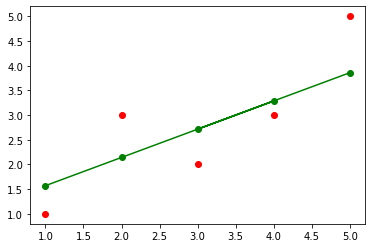

In [14]:
plt.scatter(x, y, color = "red")
plt.plot(x,pred, color = "green", marker='o')
plt.show()

# with train test split